In [2]:
from qiskit import *

In [4]:
def And(inp1, inp2):
    qc = QuantumCircuit(3,1)
    
    if(inp1 == '1'):
        qc.x(0)
    if(inp2 == '1'):
        qc.x(1)

    qc.barrier()
    qc.ccx(0,1,2)
    
    qc.measure(2,0)
    qc.draw()
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

In [5]:
for inp1 in ['0', '1']:
    for inp2 in ['0','1']:
            qc, out = And(inp1, inp2)
            print('And gate input is', inp1, inp2, 'output is ', out)
            display(qc.draw())
            print('/n')

And gate input is 0 0 output is  0


░         
q_0: ─░───■─────
      ░   │     
q_1: ─░───■─────
      ░ ┌─┴─┐┌─┐
q_2: ─░─┤ X ├┤M├
      ░ └───┘└╥┘
c: 1/═════════╩═
              0

/n
And gate input is 0 1 output is  0


░         
q_0: ──────░───■─────
     ┌───┐ ░   │     
q_1: ┤ X ├─░───■─────
     └───┘ ░ ┌─┴─┐┌─┐
q_2: ──────░─┤ X ├┤M├
           ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

/n
And gate input is 1 0 output is  0


┌───┐ ░         
q_0: ┤ X ├─░───■─────
     └───┘ ░   │     
q_1: ──────░───■─────
           ░ ┌─┴─┐┌─┐
q_2: ──────░─┤ X ├┤M├
           ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

/n
And gate input is 1 1 output is  1


┌───┐ ░         
q_0: ┤ X ├─░───■─────
     ├───┤ ░   │     
q_1: ┤ X ├─░───■─────
     └───┘ ░ ┌─┴─┐┌─┐
q_2: ──────░─┤ X ├┤M├
           ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

/n


In [8]:
IBMQ.save_account("35e27d8d7b2151e13807719aac67740cf61a01cd7f6b546559ccee02dcdd225f22b71a831c620edf0809d29914e69fb9d62ca27f8c9035bb630a529ad40bcf88")

In [16]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [20]:
providers = IBMQ.get_provider('ibm-q')
providers.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [21]:
provider = IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 703 queued and 5 qubits
ibmq_16_melbourne has 14700 queued and 15 qubits
ibmq_armonk has 1 queued and 1 qubits
ibmq_athens has 6501 queued and 5 qubits
ibmq_santiago has 3048 queued and 5 qubits
ibmq_lima has 49 queued and 5 qubits
ibmq_belem has 14 queued and 5 qubits
ibmq_quito has 5 queued and 5 qubits
simulator_statevector has 0 queued and simulated qubits
simulator_mps has 0 queued and simulated qubits
simulator_extended_stabilizer has 0 queued and simulated qubits
simulator_stabilizer has 0 queued and simulated qubits


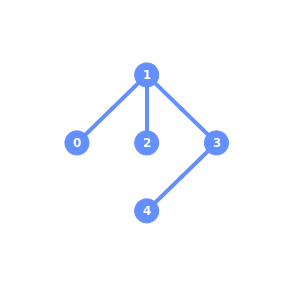

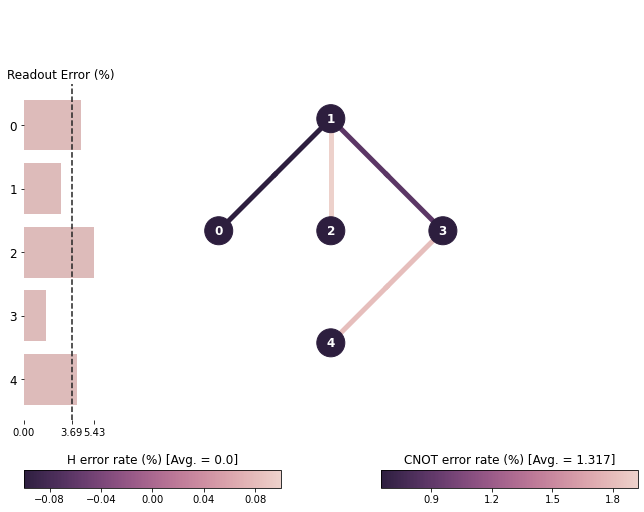

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
import qiskit.tools.jupyter

backend_ex = provider.get_backend('ibmq_quito')
backend_ex

In [23]:
backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 2 and not x.configuration().simulator
                             and x.status().operational==True)
backends

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>]

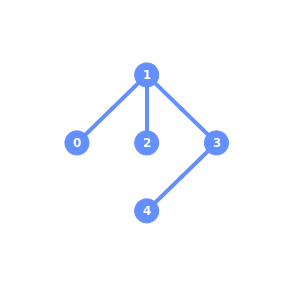

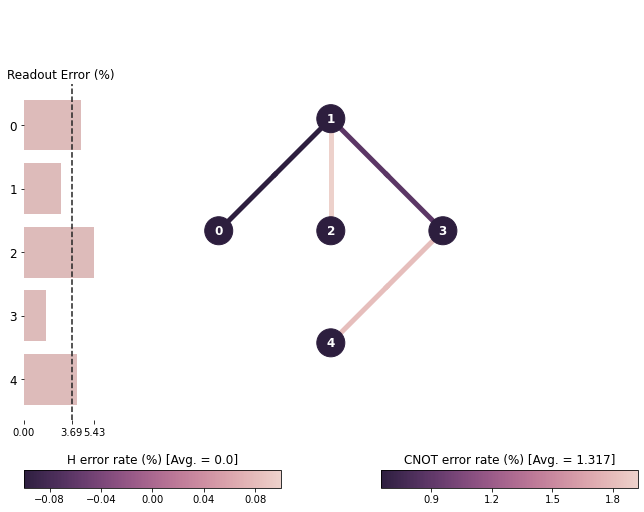

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [24]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

In [25]:
backend1 = provider.get_backend('ibmq_belem')
backend2 = provider.get_backend('ibmq_quito')

In [26]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw())
print('\n\nTranspiled AND gate with all the reqiured connectiviy')
qc_and.decompose().draw()

AND gate


q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘



Transpiled AND gate with all the reqiured connectiviy


┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ TDG ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

In [27]:
from qiskit.tools.monitor import job_monitor

In [28]:
def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = execute(qc_trans, backend, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

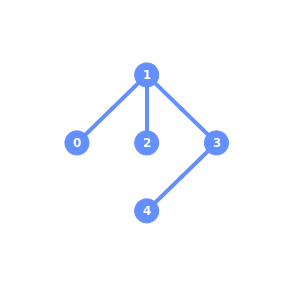

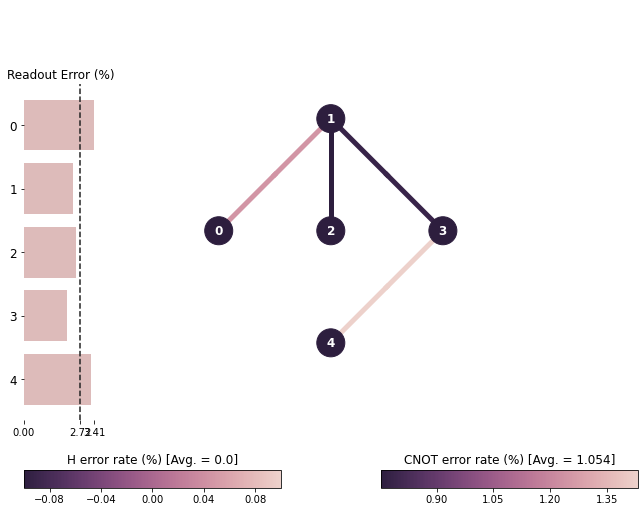

<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

In [29]:
backend1

In [30]:
layout1 = [0,2,4]

In [31]:
output1_all = []
qc_trans1_all = []
prob1_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans1, output1 = AND(input1, input2, backend1, layout1)
        
        output1_all.append(output1)
        qc_trans1_all.append(qc_trans1)
        
        prob = output1[str(int( input1=='1' and input2=='1' ))]/8192
        prob1_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print( '{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

6078128326eae171236f90f9
Job Status: job has successfully run

Probability of correct answer for inputs 0 0
0.87
---------------------------------
607812c14638592368b63466
Job Status: job has successfully run

Probability of correct answer for inputs 0 1
0.88
---------------------------------
6078131626eae1c88b6f9100
Job Status: job has successfully run

Probability of correct answer for inputs 1 0
0.90
---------------------------------
607813d465fc992c5cd7f998
Job Status: job has successfully run

Probability of correct answer for inputs 1 1
0.64
---------------------------------


The highest of these probabilities was 0.90
The lowest of these probabilities was 0.64


In [40]:
print('Transpiled AND gate circuit for ibmq_athens with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans1_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[0]) )
qc_trans1_all[0].draw()

Transpiled AND gate circuit for ibmq_athens with input 0 0

The circuit depth : 28
# of nonlocal gates : 19
Probability of correct answer : 0.87


global phase: 3π/4
                ░                                                             »
      q_0 -> 0 ─░──────────────────────────────────────────────────────■──────»
                ░            ┌───┐                                   ┌─┴─┐    »
ancilla_0 -> 1 ────────■─────┤ X ├──────■──────────────────────■─────┤ X ├────»
                ░    ┌─┴─┐   └─┬─┘    ┌─┴─┐                    │     └───┘    »
      q_1 -> 2 ─░────┤ X ├─────■──────┤ X ├────────────────────┼──────────────»
                ░    └───┘            └───┘        ┌───┐     ┌─┴─┐┌──────────┐»
ancilla_1 -> 3 ─────────────────────────────────■──┤ X ├──■──┤ X ├┤ RZ(3π/4) ├»
                ░ ┌─────────┐┌────┐┌─────────┐┌─┴─┐└─┬─┘┌─┴─┐└───┘└──────────┘»
      q_2 -> 4 ─░─┤ RZ(π/2) ├┤ √X ├┤ RZ(π/2) ├┤ X ├──■──┤ X ├─────────────────»
                ░ └─────────┘└────┘└─────────┘└───┘     └───┘                 »
          c: 1/═══════════════════════════════════════════════════════════════»
                                                                              »
«               ┌───┐                                                          »
«      q_0 -> 0 ┤ X ├──────■───────────────────────────────────────────────────»
«               └─┬─┘    ┌─┴─┐   ┌────┐      ┌───────┐  ┌────┐┌──────────┐     »
«ancilla_0 -> 1 ──■──────┤ X ├───┤ √X ├──■───┤ RZ(π) ├──┤ √X ├┤ RZ(7π/4) ├──■──»
«                        └───┘   └────┘  │   └───────┘  └────┘└──────────┘  │  »
«      q_1 -> 2 ─────────────────────────┼──────────────────────────────────┼──»
«               ┌────┐┌─────────┐      ┌─┴─┐┌──────────┐┌────┐            ┌─┴─┐»
«ancilla_1 -> 3 ┤ √X ├┤ RZ(π/2) ├──────┤ X ├┤ RZ(3π/2) ├┤ √X ├────────────┤ X ├»
«               └────┘└─────────┘      └───┘└──────────┘└────┘            └───┘»
«      q_2 -> 4 ───────────────────────────────────────────────────────────────»
«                                                                              »
«          c: 1/═══════════════════════════════════════════════════════════════»
«                                                                              »
«                              ┌─────────┐                              ┌───┐»
«      q_0 -> 0 ───────■───────┤ RZ(π/4) ├───────────────────────────■──┤ X ├»
«                    ┌─┴─┐     ├─────────┴┐                   ┌───┐┌─┴─┐└─┬─┘»
«ancilla_0 -> 1 ─────┤ X ├─────┤ RZ(7π/4) ├───────────────────┤ X ├┤ X ├──■──»
«                    └───┘     └──────────┘                   └─┬─┘└───┘     »
«      q_1 -> 2 ────────────────────────────────────────────────┼────────────»
«               ┌─────────────┐   ┌────┐   ┌────┐┌───────────┐  │            »
«ancilla_1 -> 3 ┤ RZ(-1.6417) ├───┤ √X ├───┤ √X ├┤ RZ(3.856) ├──■────────────»
«               └─────────────┘   └────┘   └────┘└───────────┘               »
«      q_2 -> 4 ─────────────────────────────────────────────────────────────»
«                                                                            »
«          c: 1/═════════════════════════════════════════════════════════════»
«                                                                            »
«                    ┌──────────┐   ┌────┐   ┌─────────┐ ░ ┌─┐
«      q_0 -> 0 ──■──┤ RZ(3π/4) ├───┤ √X ├───┤ RZ(π/2) ├─░─┤M├
«               ┌─┴─┐└──┬───┬───┘┌──┴────┴──┐└──┬───┬──┘ ░ └╥┘
«ancilla_0 -> 1 ┤ X ├───┤ X ├────┤ RZ(7π/4) ├───┤ X ├────░──╫─
«               └───┘   └─┬─┘    └──────────┘   └─┬─┘    ░  ║ 
«      q_1 -> 2 ──────────┼───────────────────────┼──────░──╫─
«                         │                       │      ░  ║ 
«ancilla_1 -> 3 ──────────■───────────────────────■──────░──╫─
«                                                        ░  ║ 
«      q_2 -> 4 ─────────────────────────────────────────░──╫─
«                                                        ░  ║ 
«          c: 1/════════════════════════════════════════════╩═
«                                                           0

In [41]:
print('Transpiled AND gate circuit for ibmqx2 with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans1_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[1]) )
qc_trans1_all[1].draw()

Transpiled AND gate circuit for ibmqx2 with input 0 1

The circuit depth : 33
# of nonlocal gates : 22
Probability of correct answer : 0.88


global phase: π/4
                     ░                                                 »
      q_0 -> 0 ──────░─────────────────────────────────────────────────»
                     ░            ┌───┐                                »
ancilla_0 -> 1 ─────────────■─────┤ X ├──────■──────────────────────■──»
               ┌───┐ ░    ┌─┴─┐   └─┬─┘    ┌─┴─┐                    │  »
      q_1 -> 2 ┤ X ├─░────┤ X ├─────■──────┤ X ├────────────────────┼──»
               └───┘ ░    └───┘            └───┘        ┌───┐     ┌─┴─┐»
ancilla_1 -> 3 ──────────────────────────────────────■──┤ X ├──■──┤ X ├»
                     ░ ┌─────────┐┌────┐┌─────────┐┌─┴─┐└─┬─┘┌─┴─┐└───┘»
      q_2 -> 4 ──────░─┤ RZ(π/2) ├┤ √X ├┤ RZ(π/2) ├┤ X ├──■──┤ X ├─────»
                     ░ └─────────┘└────┘└─────────┘└───┘     └───┘     »
          c: 1/════════════════════════════════════════════════════════»
                                                                       »
«                           ┌───┐                     ┌───┐            »
«      q_0 -> 0 ─────■──────┤ X ├──■────────────■─────┤ X ├──────■─────»
«                  ┌─┴─┐    └─┬─┘┌─┴─┐        ┌─┴─┐   └─┬─┘    ┌─┴─┐   »
«ancilla_0 -> 1 ───┤ X ├──────■──┤ X ├──■─────┤ X ├─────■──────┤ X ├───»
«                  └───┘         └───┘  │     └───┘            └───┘   »
«      q_1 -> 2 ────────────────────────┼──────────────────────────────»
«               ┌──────────┐          ┌─┴─┐┌─────────┐┌────┐┌─────────┐»
«ancilla_1 -> 3 ┤ RZ(7π/4) ├──────────┤ X ├┤ RZ(π/4) ├┤ √X ├┤ RZ(π/2) ├»
«               └──────────┘          └───┘└─────────┘└────┘└─────────┘»
«      q_2 -> 4 ───────────────────────────────────────────────────────»
«                                                                      »
«          c: 1/═══════════════════════════════════════════════════════»
«                                                                      »
«                                                                     »
«      q_0 -> 0 ──────────────────────────────────────────────────────»
«               ┌───────┐┌────┐      ┌───────┐  ┌────┐┌─────────┐     »
«ancilla_0 -> 1 ┤ RZ(π) ├┤ √X ├──■───┤ RZ(π) ├──┤ √X ├┤ RZ(π/4) ├──■──»
«               └───────┘└────┘  │   └───────┘  └────┘└─────────┘  │  »
«      q_1 -> 2 ─────────────────┼─────────────────────────────────┼──»
«                              ┌─┴─┐┌──────────┐┌────┐           ┌─┴─┐»
«ancilla_1 -> 3 ───────────────┤ X ├┤ RZ(3π/2) ├┤ √X ├───────────┤ X ├»
«                              └───┘└──────────┘└────┘           └───┘»
«      q_2 -> 4 ──────────────────────────────────────────────────────»
«                                                                     »
«          c: 1/══════════════════════════════════════════════════════»
«                                                                     »
«                                                                    »
«      q_0 -> 0 ──────■──────────────────────────────────────────────»
«                   ┌─┴─┐                                  ┌───┐     »
«ancilla_0 -> 1 ────┤ X ├───────────────────────────────■──┤ X ├──■──»
«                   └───┘                               │  └─┬─┘  │  »
«      q_1 -> 2 ────────────────────────────────────────┼────┼────┼──»
«               ┌───────────┐┌────┐┌────┐┌───────────┐┌─┴─┐  │  ┌─┴─┐»
«ancilla_1 -> 3 ┤ RZ(-3π/8) ├┤ √X ├┤ √X ├┤ RZ(11π/8) ├┤ X ├──■──┤ X ├»
«               └───────────┘└────┘└────┘└───────────┘└───┘     └───┘»
«      q_2 -> 4 ─────────────────────────────────────────────────────»
«                                                                    »
«          c: 1/═════════════════════════════════════════════════════»
«                                                                    »
«                           ┌─────────┐             ░    
«      q_0 -> 0 ─────■──────┤ RZ(π/4) ├──────■──────░────
«                  ┌─┴─┐    ├─────────┴┐   ┌─┴─┐    ░    
«ancilla_0 -> 1 ───┤ X ├────┤ RZ(7π/4) ├───┤ X ├───

In [42]:
print('Transpiled AND gate circuit for ibmqx2 with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans1_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[2]) )
qc_trans1_all[2].draw()

Transpiled AND gate circuit for ibmqx2 with input 1 0

The circuit depth : 25
# of nonlocal gates : 21
Probability of correct answer : 0.90


global phase: 13π/8
               ┌───┐ ░                                                 »
      q_0 -> 0 ┤ X ├─░─────────────────────────────────────────────────»
               └───┘ ░            ┌───┐                                »
ancilla_0 -> 1 ─────────────■─────┤ X ├──────■──────────────────────■──»
                     ░    ┌─┴─┐   └─┬─┘    ┌─┴─┐                    │  »
      q_1 -> 2 ──────░────┤ X ├─────■──────┤ X ├────────────────────┼──»
                     ░    └───┘            └───┘        ┌───┐     ┌─┴─┐»
ancilla_1 -> 3 ──────────────────────────────────────■──┤ X ├──■──┤ X ├»
                     ░ ┌─────────┐┌────┐┌─────────┐┌─┴─┐└─┬─┘┌─┴─┐└───┘»
      q_2 -> 4 ──────░─┤ RZ(π/2) ├┤ √X ├┤ RZ(π/2) ├┤ X ├──■──┤ X ├─────»
                     ░ └─────────┘└────┘└─────────┘└───┘     └───┘     »
          c: 1/════════════════════════════════════════════════════════»
                                                                       »
«                           ┌───┐                     ┌───┐          »
«      q_0 -> 0 ─────■──────┤ X ├──■────────────■─────┤ X ├──■───────»
«                  ┌─┴─┐    └─┬─┘┌─┴─┐        ┌─┴─┐   └─┬─┘┌─┴─┐     »
«ancilla_0 -> 1 ───┤ X ├──────■──┤ X ├──■─────┤ X ├─────■──┤ X ├──■──»
«                  └───┘         └───┘  │     └───┘        └───┘  │  »
«      q_1 -> 2 ────────────────────────┼─────────────────────────┼──»
«               ┌──────────┐          ┌─┴─┐┌─────────┐          ┌─┴─┐»
«ancilla_1 -> 3 ┤ RZ(7π/4) ├──────────┤ X ├┤ RZ(π/4) ├──────────┤ X ├»
«               └──────────┘          └───┘└─────────┘          └───┘»
«      q_2 -> 4 ─────────────────────────────────────────────────────»
«                                                                    »
«          c: 1/═════════════════════════════════════════════════════»
«                                                                    »
«                                ┌───┐             ┌───┐    ┌──────────┐»
«      q_0 -> 0 ──────────────■──┤ X ├──■──────────┤ X ├────┤ RZ(7π/4) ├»
«               ┌─────────┐ ┌─┴─┐└─┬─┘┌─┴─┐        └─┬─┘    ├─────────┬┘»
«ancilla_0 -> 1 ┤ RZ(π/4) ├─┤ X ├──■──┤ X ├──■───────■──────┤ RZ(π/4) ├─»
«               └─────────┘ └───┘     └───┘  │              └─────────┘ »
«      q_1 -> 2 ─────────────────────────────┼──────────────────────────»
«               ┌──────────┐               ┌─┴─┐┌──────────┐   ┌────┐   »
«ancilla_1 -> 3 ┤ RZ(7π/4) ├───────────────┤ X ├┤ RZ(3π/4) ├───┤ √X ├───»
«               └──────────┘               └───┘└──────────┘   └────┘   »
«      q_2 -> 4 ────────────────────────────────────────────────────────»
«                                                                       »
«          c: 1/════════════════════════════════════════════════════════»
«                                                                       »
«                  ┌───┐    ░    
«      q_0 -> 0 ───┤ X ├────░────
«                  └─┬─┘    ░    
«ancilla_0 -> 1 ─────■──────░────
«                           ░    
«      q_1 -> 2 ────────────░────
«               ┌─────────┐ ░ ┌─┐
«ancilla_1 -> 3 ┤ RZ(π/2) ├─░─┤M├
«               └─────────┘ ░ └╥┘
«      q_2 -> 4 ────────────░──╫─
«                           ░  ║ 
«          c: 1/═══════════════╩═
«                              0

In [43]:
print('Transpiled AND gate circuit for ibmqx2 with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans1_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[3]) )
qc_trans1_all[3].draw()

Transpiled AND gate circuit for ibmqx2 with input 1 1

The circuit depth : 31
# of nonlocal gates : 17
Probability of correct answer : 0.64


global phase: π/8
               ┌───┐ ░                                                 »
      q_0 -> 0 ┤ X ├─░─────────────────────────────────────────────────»
               └───┘ ░            ┌───┐                                »
ancilla_0 -> 1 ─────────────■─────┤ X ├──────■──────────────────────■──»
               ┌───┐ ░    ┌─┴─┐   └─┬─┘    ┌─┴─┐                    │  »
      q_1 -> 2 ┤ X ├─░────┤ X ├─────■──────┤ X ├────────────────────┼──»
               └───┘ ░    └───┘            └───┘        ┌───┐     ┌─┴─┐»
ancilla_1 -> 3 ──────────────────────────────────────■──┤ X ├──■──┤ X ├»
                     ░ ┌─────────┐┌────┐┌─────────┐┌─┴─┐└─┬─┘┌─┴─┐└───┘»
      q_2 -> 4 ──────░─┤ RZ(π/2) ├┤ √X ├┤ RZ(π/2) ├┤ X ├──■──┤ X ├─────»
                     ░ └─────────┘└────┘└─────────┘└───┘     └───┘     »
          c: 1/════════════════════════════════════════════════════════»
                                                                       »
«                           ┌───┐                                         »
«      q_0 -> 0 ─────■──────┤ X ├──────■──────────────────────────────────»
«                  ┌─┴─┐    └─┬─┘    ┌─┴─┐   ┌────┐      ┌───────┐  ┌────┐»
«ancilla_0 -> 1 ───┤ X ├──────■──────┤ X ├───┤ √X ├──■───┤ RZ(π) ├──┤ √X ├»
«                  └───┘             └───┘   └────┘  │   └───────┘  └────┘»
«      q_1 -> 2 ─────────────────────────────────────┼────────────────────»
«               ┌──────────┐┌────┐┌─────────┐      ┌─┴─┐┌──────────┐┌────┐»
«ancilla_1 -> 3 ┤ RZ(3π/4) ├┤ √X ├┤ RZ(π/2) ├──────┤ X ├┤ RZ(3π/2) ├┤ √X ├»
«               └──────────┘└────┘└─────────┘      └───┘└──────────┘└────┘»
«      q_2 -> 4 ──────────────────────────────────────────────────────────»
«                                                                         »
«          c: 1/══════════════════════════════════════════════════════════»
«                                                                         »
«                                            ┌─────────┐                      »
«      q_0 -> 0 ──────────────────────■──────┤ RZ(π/4) ├──────────────────────»
«               ┌──────────┐        ┌─┴─┐    ├─────────┴┐  ┌────┐ ┌──────────┐»
«ancilla_0 -> 1 ┤ RZ(7π/4) ├──■─────┤ X ├────┤ RZ(3π/4) ├──┤ √X ├─┤ RZ(3π/2) ├»
«               └──────────┘  │     └───┘    └──────────┘  └────┘ └──────────┘»
«      q_1 -> 2 ──────────────┼───────────────────────────────────────────────»
«                           ┌─┴─┐┌──────────┐   ┌────┐   ┌───────┐            »
«ancilla_1 -> 3 ────────────┤ X ├┤ RZ(3π/2) ├───┤ √X ├───┤ RZ(π) ├────────────»
«                           └───┘└──────────┘   └────┘   └───────┘            »
«      q_2 -> 4 ──────────────────────────────────────────────────────────────»
«                                                                             »
«          c: 1/══════════════════════════════════════════════════════════════»
«                                                                             »
«                                                             ┌───┐ »
«      q_0 -> 0 ──────────────────────────────────────────────┤ X ├─»
«                       ┌────┐              ┌────┐┌──────────┐└─┬─┘ »
«ancilla_0 -> 1 ──■─────┤ √X ├───────────■──┤ √X ├┤ RZ(3π/4) ├──■───»
«                 │     └────┘           │  └────┘└──────────┘      »
«      q_1 -> 2 ──┼──────────────────────┼──────────────────────────»
«               ┌─┴─┐┌──────────┐┌────┐┌─┴─┐┌────┐┌──────────┐┌────┐»
«ancilla_1 -> 3 ┤ X ├┤ RZ(3π/2) ├┤ √X ├┤ X ├┤ √X ├┤ RZ(7π/4) ├┤ √X ├»
«               └───┘└──────────┘└────┘└───┘└────┘└──────────┘└────┘»
«      q_2 -> 4 ────────────────────────────────────────────────────»
«                                                                   »
«          c: 1/════════════════════════════════════════════════════»
«                                                                   »
«               ┌──────────┐┌───┐ ░    
«      q_0 -> 0 ┤ RZ(7π/4) ├┤ X ├─░────
«              